# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [5]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [6]:
df.describe()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
count,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,1.387210e+05,138721.000000,138721.000000,138721.000000,138721.000000
mean,408.456679,0.865017,1.224018,92.411768,57.280717,3.852491,3.468364,4.427882,4.287014,72.623256,3.806588,2.389925e+03,236.033152,2.816048,4.768151,0.005745
std,711.300625,0.604681,11.235396,1105.622216,806.837009,2.023177,2.127371,0.994649,0.992454,271.189458,1.039490,4.998821e+04,998.162648,1.497330,0.363702,0.075580
min,1.000000,0.000000,0.000000,0.000000,0.000000,-0.154151,-0.154151,0.265703,0.342945,0.000000,0.265703,1.000000e-02,0.000000,0.182322,0.421214,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.887303,0.716678,3.817305,3.811097,0.000000,3.356462,8.479000e+01,85.190000,1.408767,4.745402,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,5.064533,5.096396,4.422139,4.497450,0.000000,4.114614,1.399900e+02,139.990000,2.929287,4.886641,0.000000
75%,497.000000,1.000000,0.000000,0.000000,0.000000,5.064533,5.096396,5.563677,4.992339,0.029861,4.453620,2.395100e+02,199.754240,3.865009,4.962055,0.000000
max,2000.000000,29.000000,505.000000,258877.420000,258877.420000,5.412885,5.096396,5.563677,5.561934,4019.593056,4.874212,8.999998e+06,132568.670000,5.008490,5.040929,1.000000


# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree and Random fOREST

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [7]:
df.dtypes

accountAge                                        int64
digitalItemCount                                  int64
sumPurchaseCount1Day                              int64
sumPurchaseAmount1Day                           float64
sumPurchaseAmount30Day                          float64
paymentBillingPostalCode - LogOddsForClass_0    float64
accountPostalCode - LogOddsForClass_0           float64
paymentBillingState - LogOddsForClass_0         float64
accountState - LogOddsForClass_0                float64
paymentInstrumentAgeInAccount                   float64
ipState - LogOddsForClass_0                     float64
transactionAmount                               float64
transactionAmountUSD                            float64
ipPostalCode - LogOddsForClass_0                float64
localHour - LogOddsForClass_0                   float64
Label                                             int64
dtype: object

### Split train and test

In [8]:
y = df['Label']
X = df.drop(['Label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
y.value_counts()

0    137924
1       797
Name: Label, dtype: int64

### Standarize data

In [10]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

### PCA

Text(0, 0.5, 'cumulative explained variance')

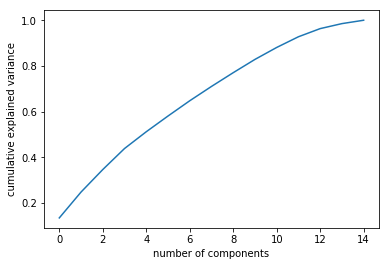

In [11]:
pca = PCA().fit(X_train_s)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

10 variables explican el 80% de los datos, por lo tanto no es conveniente aplicar PCA sobre los datos

In [273]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 10)
# Fit PCA on training set
pca.fit(X_train_s)
# Apply the mapping (transform) to both the training set and the test set.
X_train = pca.transform(X_train_s)
X_test = pca.transform(X_test_s)

print(pca.explained_variance_ratio_)
print("Total explanation: ",sum(pca.explained_variance_ratio_))

[0.13439751 0.11322615 0.09854674 0.09204775 0.07350127 0.06884543
 0.06683842 0.06272319 0.06024085 0.058123  ]
Total explanation:  0.8284903056008428


In [12]:
accuracy_scores = []

### Logistic Regression

In [13]:
lreg = LogisticRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("F_Beta-Score:",metrics.fbeta_score(y_pred, y_test,10))

accuracy_scores.append(['none','reg-log', -1, -1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

Accuracy: 0.9939053693914107
F1-score: 0.0
F_Beta-Score: 0.0


### Decision Tree

In [14]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("F_Beta-Score:",metrics.fbeta_score(y_pred, y_test,10))

accuracy_scores.append(['none','d-tree', -1, -1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   


Accuracy: 0.988466075407401
F1-score: 0.12582781456953643
F_Beta-Score: 0.11568952524491334


### Random Forest

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("F_Beta-Score:",metrics.fbeta_score(y_pred, y_test,10))

accuracy_scores.append(['none','random forest', -1, -1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   


Accuracy: 0.9939927476080214
F1-score: 0.09836065573770492
F_Beta-Score: 0.46259541984732827


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [16]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [17]:

for target_percentage in np.arange(0.05,0.55, 0.05):
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    lreg.fit(X_u,y_u)
    y_pred=rf.predict(X_test)
    accuracy_scores.append(['under-sampling','reg-log',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    dtree.fit(X_u,y_u)
    y_pred=rf.predict(X_test)
    accuracy_scores.append(['under-sampling','d-tree',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    rf.fit(X_u,y_u)
    y_pred=rf.predict(X_test)
    accuracy_scores.append(['under-sampling','random forest',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    print("Accuracy:",metrics.accuracy_score(y_pred, y_test),"F1-Score:",metrics.f1_score(y_pred, y_test),"F-Beta:",metrics.fbeta_score(y_pred, y_test,10))


Accuracy: 0.9896238367774913 F1-Score: 0.18524871355060035 F-Beta: 0.17551086082059533
Accuracy: 0.9822403774738958 F1-Score: 0.1627188465499485 F-Beta: 0.11418962432915922
Accuracy: 0.9669273450128882 F1-Score: 0.11461988304093568 F-Beta: 0.06884367936011128
Accuracy: 0.9514614006728123 F1-Score: 0.0952768729641694 F-Beta: 0.05411333714939898
Accuracy: 0.9366071038490105 F1-Score: 0.07873015873015873 F-Beta: 0.04352011119798453
Accuracy: 0.9065708418891171 F1-Score: 0.06349901467046201 F-Beta: 0.034099772978636714
Accuracy: 0.8868888985975796 F1-Score: 0.05579868708971553 F-Beta: 0.029650309397035546
Accuracy: 0.8345275022936782 F1-Score: 0.042714520409452804 F-Beta: 0.022339430029774565
Accuracy: 0.81401546594434 F1-Score: 0.038400722837135755 F-Beta: 0.020007574212718853
Accuracy: 0.77460789025296 F1-Score: 0.032989690721649485 F-Beta: 0.01709600634752711


# Exercise 15.3

Same analysis using random-over-sampling

In [18]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
   
    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)
    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.iloc[filter_], y.iloc[filter_]

In [19]:
for target_percentage in np.arange(0.05,0.55, 0.05):
    
    X_u, y_u = OverSampling(X_train, y_train, target_percentage, 42)
    lreg.fit(X_u,y_u)
    y_pred=rf.predict(X_test)
    accuracy_scores.append(['over-sampling','reg-log',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    dtree.fit(X_u,y_u)
    y_pred=rf.predict(X_test)
    accuracy_scores.append(['over-sampling','d-tree',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    rf.fit(X_u,y_u)
    y_pred=rf.predict(X_test)
    accuracy_scores.append(['over-sampling','random forest',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    print("Accuracy:",metrics.accuracy_score(y_pred, y_test),"F1-Score:",metrics.f1_score(y_pred, y_test),"FBeta:",metrics.fbeta_score(y_pred, y_test,10))


Accuracy: 0.9934029446458997 F1-Score: 0.16574585635359118 FBeta: 0.33760445682451257
Accuracy: 0.9933811000917472 F1-Score: 0.12680115273775217 FBeta: 0.29725752508361203
Accuracy: 0.9932937218751365 F1-Score: 0.13521126760563382 FBeta: 0.2929305135951661
Accuracy: 0.993512167416663 F1-Score: 0.15864022662889518 FBeta: 0.35021671826625383
Accuracy: 0.9932937218751365 F1-Score: 0.11527377521613831 FBeta: 0.27023411371237455
Accuracy: 0.9932063436585259 F1-Score: 0.12394366197183099 FBeta: 0.26851963746223567
Accuracy: 0.9933374109834419 F1-Score: 0.11594202898550722 FBeta: 0.27766323024054984
Accuracy: 0.9933155664292892 F1-Score: 0.13559322033898305 FBeta: 0.2965137614678899
Accuracy: 0.9934247892000524 F1-Score: 0.14245014245014245 FBeta: 0.3206349206349206
Accuracy: 0.9934684783083577 F1-Score: 0.138328530259366 FBeta: 0.3242809364548494


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [27]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    # Calculate the NearestNeighbors
    from sklearn.neighbors import NearestNeighbors
    nearest_neighbour_ = NearestNeighbors(n_neighbors=k + 1)
    nearest_neighbour_.fit(X[y==1])
    nns = nearest_neighbour_.kneighbors(X[y==1], 
                                    return_distance=False)[:, 1:]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__=[]
    for i, sel in enumerate(sel_):
        nn__.append(np.random.choice(nns[sel]))
    
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [28]:
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(X_train, y_train, target_percentage, k, seed=3)
        lreg.fit(X_u,y_u)
        y_pred=rf.predict(X_test)
        accuracy_scores.append(['SMOTE','reg-log',target_percentage,k,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        dtree.fit(X_u,y_u)
        y_pred=rf.predict(X_test)
        accuracy_scores.append(['SMOTE','d-tree',target_percentage,k,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        rf.fit(X_u,y_u)
        y_pred=rf.predict(X_test)
        accuracy_scores.append(['SMOTE','random forest',target_percentage,k,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        print("Accuracy:",metrics.accuracy_score(y_pred, y_test),"F1-Score:",metrics.f1_score(y_pred, y_test),"FBeta:",metrics.fbeta_score(y_pred, y_test,10))


Accuracy: 0.9929442090086942 F1-Score: 0.15223097112860892 FBeta: 0.2693333333333333
Accuracy: 0.992267027829962 F1-Score: 0.1407766990291262 FBeta: 0.20958855098389978
Accuracy: 0.9922888723841147 F1-Score: 0.1493975903614458 FBeta: 0.21933450087565673
Accuracy: 0.9908252872558871 F1-Score: 0.1286307053941909 FBeta: 0.1492729439809297


# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [29]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE
X, y = make_classification(n_classes=2, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 904, 1: 900})


In [30]:
for target_percentage in np.arange(0.05,0.55, 0.05):
        ada = ADASYN(random_state=42)
        X_u, y_u  = ada.fit_resample(X_train, y_train)
            
        lreg.fit(X_u,y_u)
        y_pred=rf.predict(X_test)
        accuracy_scores.append(['ADASYN','reg-log',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        dtree.fit(X_u,y_u)
        y_pred=rf.predict(X_test)
        accuracy_scores.append(['ADASYN','d-tree',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        rf.fit(X_u,y_u)
        y_pred=rf.predict(X_test)
        accuracy_scores.append(['ADASYN','random forest',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

        print("Accuracy:",metrics.accuracy_score(y_pred, y_test),"F1-Score:",metrics.f1_score(y_pred, y_test),"FBeta:",metrics.fbeta_score(y_pred, y_test,10))


Accuracy: 0.9925946961422517 F1-Score: 0.14609571788413098 FBeta: 0.2347895791583166
Accuracy: 0.9925510070339464 F1-Score: 0.16625916870415647 FBeta: 0.2511151736745887
Accuracy: 0.9923325614924199 F1-Score: 0.14180929095354525 FBeta: 0.2141864716636197
Accuracy: 0.9919830486259775 F1-Score: 0.12410501193317423 FBeta: 0.17894378194207833
Accuracy: 0.9925510070339464 F1-Score: 0.13670886075949368 FBeta: 0.22215885947046843
Accuracy: 0.9923325614924199 F1-Score: 0.11586901763224182 FBeta: 0.18621242484969938
Accuracy: 0.992267027829962 F1-Score: 0.13235294117647056 FBeta: 0.20088397790055249
Accuracy: 0.9925510070339464 F1-Score: 0.13231552162849872 FBeta: 0.21747412008281572
Accuracy: 0.9929223644545415 F1-Score: 0.15625 FBeta: 0.27114093959731544
Accuracy: 0.992703918913015 F1-Score: 0.13020833333333334 FBeta: 0.22595078299776283


In [31]:
accuracy_scores_df=pd.DataFrame(accuracy_scores, columns=['tecnica','algoritmo','target_perc','k','Accuracy','F1-Score','FBeta']) 

# Exercise 15.6 (3 points)

Compare and comment about the results

In [32]:
accuracy_scores_df.head()

,tecnica,algoritmo,target_perc,k,Accuracy,F1-Score,FBeta
0,none,reg-log,-1.00,-1,0.993905,0.000000,0.000000
1,none,d-tree,-1.00,-1,0.988466,0.125828,0.115690
2,none,random forest,-1.00,-1,0.993993,0.098361,0.462595
3,under-sampling,reg-log,0.05,-1,0.993993,0.098361,0.462595
4,under-sampling,d-tree,0.05,-1,0.993993,0.098361,0.462595


In [38]:
accuracy_scores_df.groupby(['tecnica', 'algoritmo']).mean()

target_perc   k  Accuracy  F1-Score     FBeta
tecnica        algoritmo                                                   
ADASYN         d-tree               0.275  -1  0.992291  0.138040  0.212618
               random forest        0.275  -1  0.992479  0.138197  0.220286
               reg-log              0.275  -1  0.992291  0.138040  0.212618
SMOTE          d-tree               0.375  10  0.992742  0.145183  0.255634
               random forest        0.375  10  0.992081  0.142759  0.211882
               reg-log              0.375  10  0.992742  0.145183  0.255634
none           d-tree              -1.000  -1  0.988466  0.125828  0.115690
               random forest       -1.000  -1  0.993993  0.098361  0.462595
               reg-log             -1.000  -1  0.993905  0.000000  0.000000
over-sampling  d-tree               0.275  -1  0.971478  0.125259  0.272867
               random forest        0.275  -1  0.993364  0.135793  0.303586
               reg-log              0.275  -1  0.971478  0.125259  0.272867
under-sampling d-tree               0.275  -1  0.926286  0.093537  0.102487
               random forest        0.275  -1  0.904347  0.087000  0.057937
               reg-log              0.275  -1  0.926286  0.093537  0.102487

In [41]:
accuracy_scores_df.groupby(['tecnica', 'target_perc']).mean()

k  Accuracy  F1-Score     FBeta
tecnica        target_perc                                  
ADASYN          0.05        -1  0.991415  0.134452  0.177778
                0.10        -1  0.992580  0.152817  0.240231
                0.15        -1  0.992478  0.158109  0.238806
                0.20        -1  0.992216  0.135908  0.202439
                0.25        -1  0.992172  0.128306  0.193349
                0.30        -1  0.992478  0.129762  0.210177
                0.35        -1  0.992311  0.121364  0.191103
                0.40        -1  0.992362  0.132340  0.206414
                0.45        -1  0.992675  0.140294  0.235363
                0.50        -1  0.992850  0.147569  0.256078
SMOTE           0.25        10  0.993006  0.145688  0.277692
                0.50        10  0.992038  0.143063  0.204409
none           -1.00        -1  0.992121  0.074729  0.192762
over-sampling   0.05        -1  0.847540  0.077242  0.123932
                0.10        -1  0.993396  0.152764  0.324155
                0.15        -1  0.993352  0.129605  0.295815
                0.20        -1  0.993367  0.143021  0.312026
                0.25        -1  0.993439  0.144185  0.323556
                0.30        -1  0.993265  0.118164  0.269663
                0.35        -1  0.993250  0.121276  0.271568
                0.40        -1  0.993330  0.122492  0.283947
                0.45        -1  0.993352  0.137879  0.304554
                0.50        -1  0.993439  0.141076  0.321850
under-sampling  0.05        -1  0.992536  0.127323  0.366901
                0.10        -1  0.987163  0.177739  0.155070
                0.15        -1  0.977136  0.146686  0.099074
                0.20        -1  0.961772  0.108172  0.063934
                0.25        -1  0.946510  0.089761  0.050582
                0.30        -1  0.926595  0.073653  0.040380
                0.35        -1  0.900010  0.060932  0.032617
                0.40        -1  0.869435  0.051437  0.027213
                0.45        -1  0.827690  0.041277  0.021562
                0.50        -1  0.800880  0.036597  0.019037

In [37]:
accuracy_scores_df.groupby(['tecnica', 'k']).mean()

target_perc  Accuracy  F1-Score     FBeta
tecnica        k                                             
ADASYN         -1         0.275  0.992354  0.138092  0.215174
SMOTE           5         0.375  0.992784  0.143307  0.259401
                15        0.375  0.992260  0.145444  0.222700
none           -1        -1.000  0.992121  0.074729  0.192762
over-sampling  -1         0.275  0.978773  0.128770  0.283107
under-sampling -1         0.275  0.918973  0.091358  0.087637

Observando los resutados, la tecnica que da mejores resultados es SMOTE, considerando que todas tienen un Accuracy alto debido al desbalanceo de las clases. Dado que en nuestro caso, el costo de falsos negativos es peor que el costo de los falsos positivos, se realzia el ranking con base en el F1-Score, obteniendo el 